In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util
from pathlib import Path
import pandas as pd
import numpy as np
from spotifuncs import *

In [2]:
path = Path("C:/Users/ms101/OneDrive/DataScience_ML/projects/spotify_app")

In [3]:
with open(path / "client_s.txt") as f:
    content = f.readlines()
content = [x.strip() for x in content]

client_id = content[0]
client_secret = content[1]

In [4]:
with open(path / "usernames.txt") as f:
    usernames = f.readlines()
usernames = [x.strip() for x in usernames]

username = usernames[2]


In [5]:
scope = "user-library-read user-read-recently-played user-top-read playlist-modify-public playlist-read-private playlist-read-collaborative"

redirect_uri = "https://developer.spotify.com/dashboard/applications/4a4e029d299a4241873db8300038bf0a"

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, 
                                                      client_secret=client_secret)

In [7]:
sp = authenticate(redirect_uri, client_credentials_manager, username, scope, client_id, client_secret)

In [46]:
top_tracks_short = sp.current_user_top_tracks(limit = 50,offset=0,time_range='short_term')
top_tracks_med = sp.current_user_top_tracks(limit = 50,offset=0,time_range='medium_term')
top_tracks_long = sp.current_user_top_tracks(limit = 50,offset=0,time_range='long_term')

#combine the top_tracks
top_tracks_short_df = append_audio_features(create_df_top_songs(top_tracks_short),sp)
top_tracks_med_df = append_audio_features(create_df_top_songs(top_tracks_med),sp)
top_tracks_long_df = append_audio_features(create_df_top_songs(top_tracks_long),sp)

top_tracks_short_df["Timeframe"] = "short term"
top_tracks_med_df["Timeframe"] = "medium term"
top_tracks_long_df["Timeframe"] = "long term"

top_tracks = pd.concat([top_tracks_short_df, top_tracks_med_df, top_tracks_long_df])
top_tracks.drop_duplicates().reset_index(drop = True)

top_artists_long = sp.current_user_top_artists(limit = 50, time_range = "long_term")
top_artists_med = sp.current_user_top_artists(limit = 50, time_range = "medium_term")
top_artists_short = sp.current_user_top_artists(limit = 50, time_range = "short_term")


artists_short_df = top_artists_from_API(top_artists_short)
artists_med_df = top_artists_from_API(top_artists_med)
artists_long_df = top_artists_from_API(top_artists_long)


artists_df = pd.concat([artists_short_df,artists_med_df,artists_long_df])
artists_df["genres"] = artists_df["genres"].apply(lambda x: ",".join(x))
artists_df.drop_duplicates().reset_index(drop = True)

,name,id,genres,popularity,uri
0,Chase Atlantic,7cYEt1pqMgXJdq00hAwVpT,"electropop,modern rock,pop,rock",72,spotify:artist:7cYEt1pqMgXJdq00hAwVpT
1,Kontra K,4lDiJcOJ2GLCK6p9q5BgfK,"christlicher rap,german hip hop",74,spotify:artist:4lDiJcOJ2GLCK6p9q5BgfK
2,Sabrina Carpenter,74KM79TiuVKeVCqs8QtB0B,"dance pop,electropop,pop,pop dance,post-teen p...",76,spotify:artist:74KM79TiuVKeVCqs8QtB0B
3,Marshmello,64KEffDW9EtZ1y2vBYgq8T,"brostep,edm,pop,pop dance,progressive electro ...",88,spotify:artist:64KEffDW9EtZ1y2vBYgq8T
4,SXTN,0tMFcqLXhtm1Gep20iuIR3,"deep german hip hop,frauenrap,german hip hop",60,spotify:artist:0tMFcqLXhtm1Gep20iuIR3
5,Ariana Grande,66CXWjxzNUsdJxJ2JdwvnR,"pop,post-teen pop",98,spotify:artist:66CXWjxzNUsdJxJ2JdwvnR
6,Juice WRLD,4MCBfE4596Uoi2O4DtmEMz,"chicago rap,melodic rap",97,spotify:artist:4MCBfE4596Uoi2O4DtmEMz
7,Ufo361,5pVRwX5ZQR7hfJ18w8ZYkl,"german cloud rap,german hip hop",78,spotify:artist:5pVRwX5ZQR7hfJ18w8ZYkl
8,Pop Smoke,0eDvMgVFoNV3TpwtrVCoTj,brooklyn drill,93,spotify:artist:0eDvMgVFoNV3TpwtrVCoTj
9,BLACKPINK,41MozSoPIsD1dJM0CLPjZF,"k-pop,k-pop girl group",89,spotify:artist:41MozSoPIsD1dJM0CLPjZF


In [47]:
top_tracks

,track_name,album,track_id,artist,duration,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Timeframe
0,Swim,Chase Atlantic,3M0lSi5WW79CXQamgSBIjx,Chase Atlantic,228786,73,0.666,0.542,8,-6.429,1,0.0392,0.2700,0.000000,0.0765,0.0771,120.134,short term
1,WHAT TO DO? (feat. Don Toliver),JACKBOYS,4AO1XhrgJczQ9bNVxdfKQe,JACKBOYS,250141,75,0.643,0.594,9,-5.191,0,0.0312,0.0695,0.000015,0.1150,0.1950,118.037,short term
2,Twingo,Twingo,0SkGIhZtmDJ5ggyeDsCNkf,Fynn Kliemann,186984,62,0.619,0.638,2,-5.754,0,0.0906,0.2970,0.000001,0.4400,0.3600,141.967,short term
3,Your Man,Nectar,6Vgtvd7I5yopJdBuxqjBd2,Joji,163758,76,0.785,0.818,7,-8.711,1,0.0990,0.6240,0.149000,0.1490,0.0503,117.980,short term
4,Leaked,True 2 Myself,0W64NfLrIsRTAFObko6uJx,Lil Tjay,220240,78,0.510,0.619,7,-7.918,1,0.2810,0.8010,0.000000,0.0811,0.3210,97.018,short term
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,Cyber Sex,Hot Pink,1ghvzmzpx2nnrbx7wtpMgo,Doja Cat,165733,75,0.917,0.657,8,-5.716,1,0.0921,0.3180,0.000004,0.0754,0.8180,131.030,long term
46,Tongue Tied (with YUNGBLUD & blackbear),Tongue Tied (with YUNGBLUD & blackbear),7jzldCBnJjpJM3epzJ85KE,Marshmello,186024,68,0.628,0.821,1,-2.721,0,0.0525,0.0208,0.000000,0.4260,0.4650,93.001,long term
47,Smaller Than This,Smaller Than This,29A7Zz30FbIbvlnHHaJdIx,Sara Kays,208655,38,0.566,0.369,1,-9.181,1,0.0249,0.7930,0.000000,0.1090,0.2050,105.994,long term
48,Falling,Falling,4TnjEaWOeW0eKTKIEvJyCa,Trevor Daniel,159381,87,0.785,0.431,10,-8.756,0,0.0364,0.1230,0.000000,0.0887,0.2360,127.085,long term


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
list(top_tracks_short_df.columns[6:-2])

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence']

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

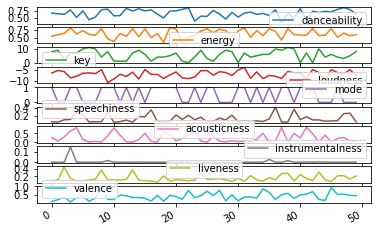

In [73]:
audio_features = list(top_tracks_short_df.columns[6:-2])
audio_features.append("Timeframe")

In [79]:
audio_overtime_df = top_tracks[audio_features].groupby("Timeframe").mean()
audio_overtime_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence
Timeframe,,,,,,,,,,
long term,0.66304,0.63300,5.86,-6.61438,0.60,0.092126,0.251583,0.005209,0.170326,0.471144
medium term,0.68136,0.62924,5.18,-6.76458,0.58,0.095004,0.226746,0.004104,0.138608,0.420542
short term,0.66150,0.63130,5.56,-6.99682,0.52,0.117488,0.243830,0.004293,0.150516,0.394326


In [97]:
audio_overtime_df.reset_index(inplace = True)

In [98]:
plot_df = pd.melt(audio_overtime_df, id_vars = "Timeframe",
                           var_name = "audio_feature", value_name = "mean")
plot_df

,Timeframe,audio_feature,mean
0,long term,danceability,0.663040
1,medium term,danceability,0.681360
2,short term,danceability,0.661500
3,long term,energy,0.633000
4,medium term,energy,0.629240
5,short term,energy,0.631300
6,long term,key,5.860000
7,medium term,key,5.180000
8,short term,key,5.560000
9,long term,loudness,-6.614380


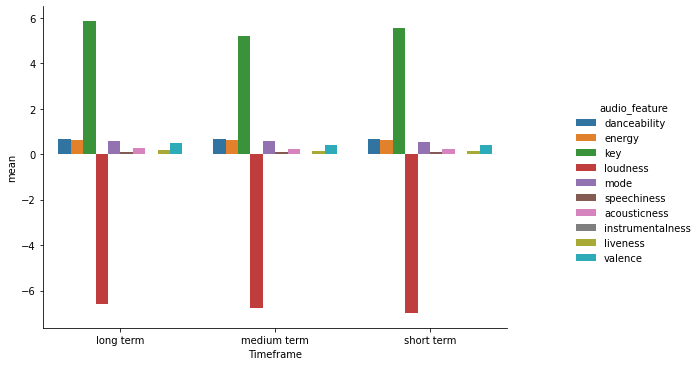

In [136]:
#%matplotlib inline
sns.catplot(data = plot_df, kind = "bar", x = "Timeframe",
            y = "mean", hue = "audio_feature"
)
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

In [141]:
cluster_feat = audio_features[:-1]
cluster_feat

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence']

array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>],
       [<AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>],
       [<AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>]], dtype=object)

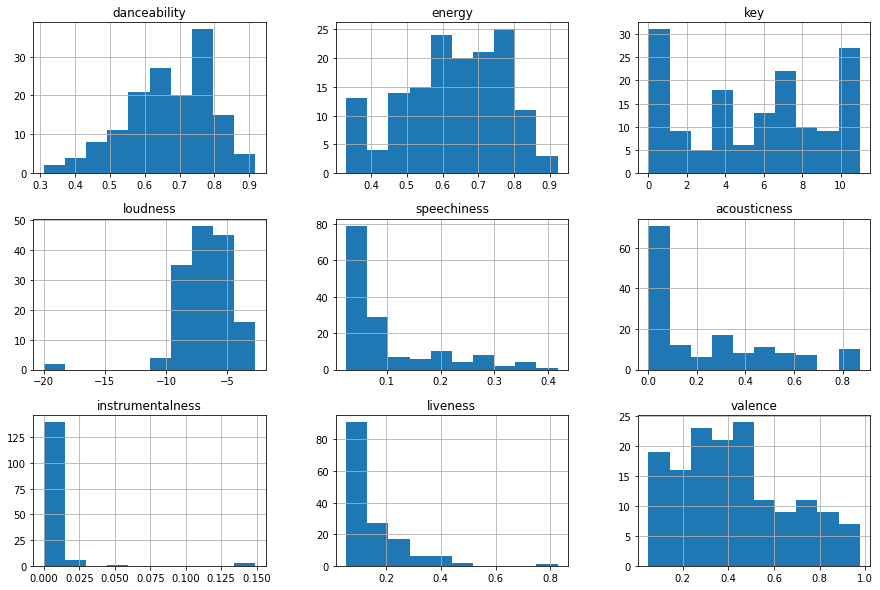

In [149]:
df_cluster = top_tracks[cluster_feat].drop("mode",axis = 1)
df_cluster.hist(figsize= (15,10))

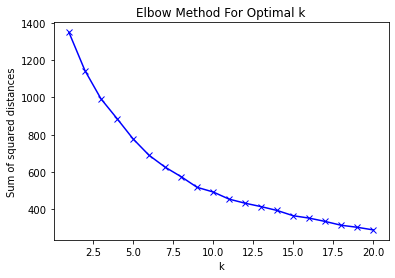

In [151]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = np.array(df_cluster)
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)


ss_dist = []
for k in range(1,21):
    km = KMeans(n_clusters=k,max_iter = 10000 ,random_state=13)
    km = km.fit(X)
    ss_dist.append(km.inertia_)
    
plt.plot(range(1,21), ss_dist, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()



In [159]:
n_cluster = 9
km = KMeans(n_clusters = n_cluster, max_iter = 10000, random_state=13).fit(X)

In [160]:
X_pred = km.predict(X)

In [161]:
X_pred

array([4, 4, 6, 3, 2, 7, 4, 4, 5, 1, 2, 0, 0, 6, 1, 7, 1, 0, 2, 0, 7, 1,
       1, 2, 7, 0, 0, 5, 4, 1, 0, 7, 4, 0, 0, 5, 7, 2, 5, 7, 0, 2, 0, 4,
       4, 5, 0, 1, 7, 4, 0, 1, 5, 3, 4, 6, 5, 6, 1, 0, 8, 7, 0, 7, 0, 2,
       5, 2, 6, 4, 2, 2, 4, 4, 5, 5, 0, 7, 7, 0, 0, 0, 2, 7, 5, 1, 1, 5,
       4, 7, 5, 4, 1, 0, 0, 0, 7, 0, 0, 4, 4, 1, 8, 5, 1, 6, 2, 4, 0, 4,
       1, 0, 0, 4, 7, 0, 0, 5, 2, 4, 2, 4, 0, 5, 7, 0, 5, 7, 5, 5, 0, 0,
       6, 5, 5, 2, 7, 0, 5, 0, 7, 3, 4, 7, 6, 5, 6, 2, 4, 4])